In [1]:
# 2023 Gabriel J. Diaz @ RIT


import cv2
import os
import sys
import numpy as np
import av
import logging
import pickle
from tqdm import tqdm


import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pathlib import Path, PurePath

import sys
sys.path.append('../..')
from flow_source import *

logger = logging.getLogger(__name__)
logger.addHandler(logging.StreamHandler(stream=sys.stdout))

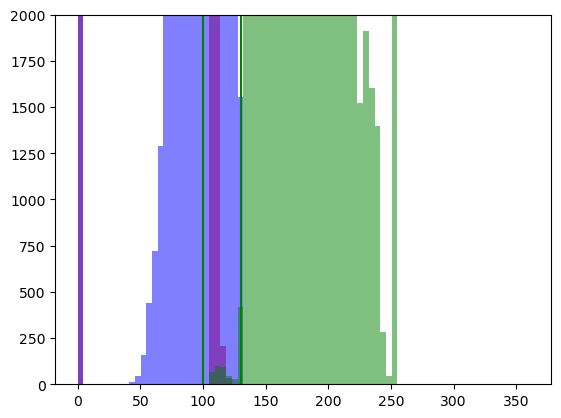

In [2]:
sky = cv2.imread('sky.png')
sky = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)

plt.hist(sky[...,0].flatten(),color='red',alpha=0.5, bins=np.linspace(0,360,80));
plt.hist(sky[...,1].flatten(),color='blue',alpha=0.5, bins=np.linspace(0,360,80));
plt.hist(sky[...,2].flatten(),color='green',alpha=0.5, bins=np.linspace(0,360,80));

plt.ylim([0,2000])
plt.vlines(x = 100, ymin=0, ymax=10000,colors='g')
plt.vlines(x = 130, ymin=0, ymax=10000,colors='g')


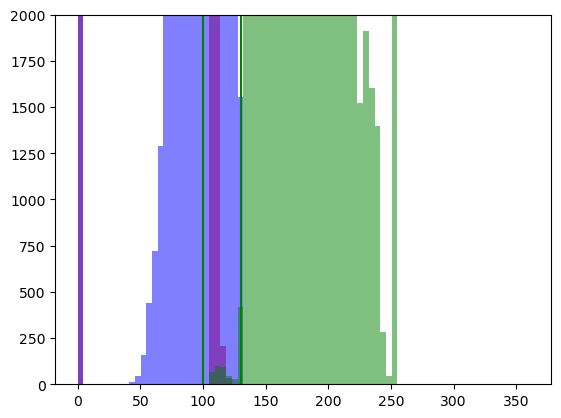

In [3]:
bg = cv2.imread('bg.png')
bg = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)
plt.hist(sky[...,0].flatten(),color='red',alpha=0.5, bins=np.linspace(0,360,80));
plt.hist(sky[...,1].flatten(),color='blue',alpha=0.5, bins=np.linspace(0,360,80));
plt.hist(sky[...,2].flatten(),color='green',alpha=0.5, bins=np.linspace(0,360,80));

plt.ylim([0,2000])
plt.vlines(x = 100, ymin=0, ymax=10000,colors='g')
plt.vlines(x = 130, ymin=0, ymax=10000,colors='g')


## Mask sky from image

In [4]:
lower = np.array([100, 45, 100])
upper = np.array([120, 140,260])

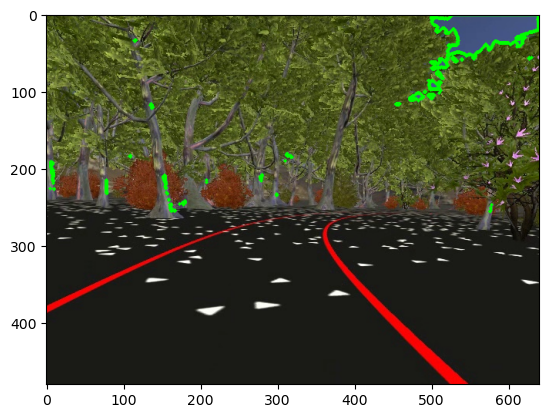

In [22]:
#frame = cv2.imread(os.path.join('world_image_out','25.jpg'))
frame = cv2.imread(os.path.join('image_out','16340.jpg'))
# frame = cv2.GaussianBlur(frame, (5, 5), 0)

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower, upper)
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


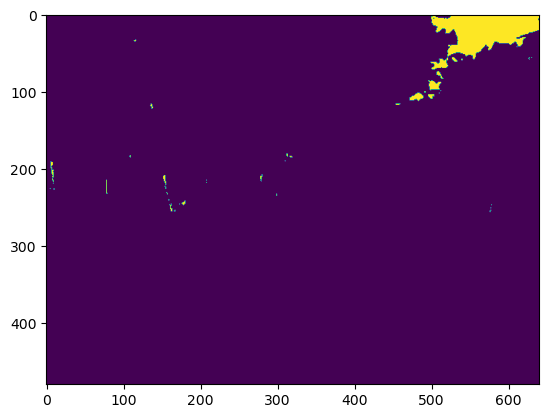

In [23]:
plt.imshow(mask)

### Remove

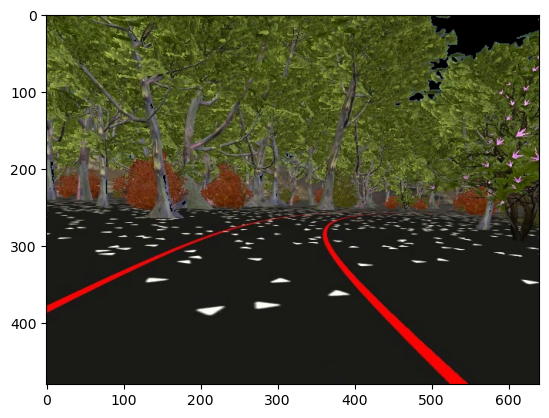

In [28]:
frame = cv2.imread(os.path.join('image_out','16340.jpg'))
# frame = cv2.GaussianBlur(frame, (5, 5), 0)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower = np.array([100, 45, 100])
upper = np.array([120, 140,260])

mask = cv2.inRange(hsv, lower, upper)
mask = 255 - mask
out = cv2.bitwise_and(frame,frame,mask = mask)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))

In [29]:
sky = cv2.imread('sky.png')
sky = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)

for i in np.arange(3):
    print(f'{i}) {np.min(sky[...,i])} - {np.max(sky[...,i])}')

0) 0 - 120
1) 0 - 130
2) 103 - 255


# Roads

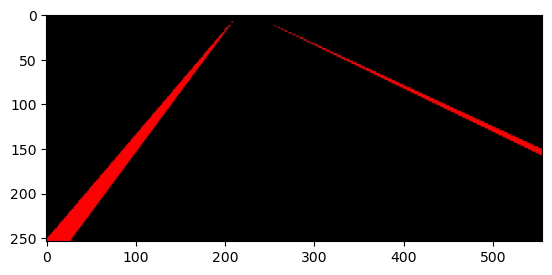

In [30]:
road = cv2.imread('road.tif')
plt.imshow(cv2.cvtColor(road, cv2.COLOR_BGRA2RGBA) )

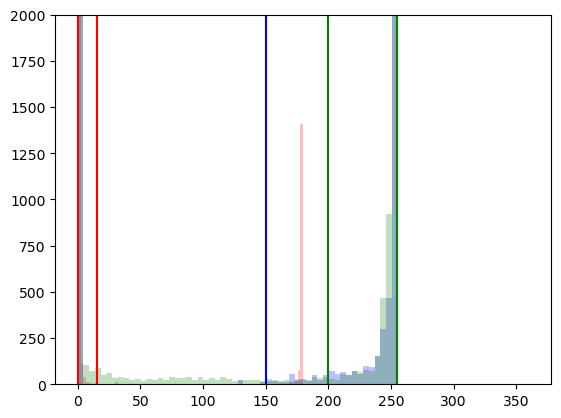

In [31]:
road = cv2.imread('road.tif')
road = cv2.cvtColor(road, cv2.COLOR_BGR2HSV)

plt.hist(road[...,0].flatten(),color='red',alpha=0.25, bins=np.linspace(0,180,80)); # 0,180
plt.hist(road[...,1].flatten(),color='blue',alpha=0.25, bins=np.linspace(0,360,80));
plt.hist(road[...,2].flatten(),color='green',alpha=0.25, bins=np.linspace(0,360,80));

plt.ylim([0,2000])
plt.vlines(x = 0, ymin=0, ymax=10000,colors='r')
plt.vlines(x = 15, ymin=0, ymax=10000,colors='r')

plt.vlines(x = 150, ymin=0, ymax=10000,colors='b')
plt.vlines(x = 255, ymin=0, ymax=10000,colors='b')

plt.vlines(x = 200, ymin=0, ymax=10000,colors='g')
plt.vlines(x = 255, ymin=0, ymax=10000,colors='g')


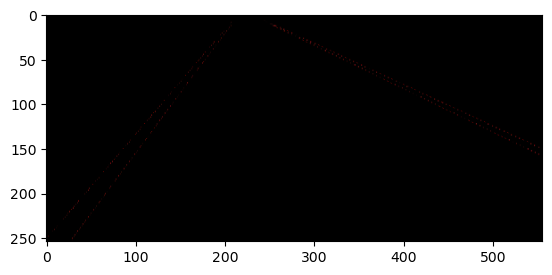

In [32]:
frame = cv2.imread('road.tif')
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower = np.array([0, 100, 100])
upper = np.array([40, 255,255])
mask1 = cv2.inRange(hsv, lower, upper)

lower = np.array([170, 100, 100])
upper = np.array([180, 255,255])
mask2 = cv2.inRange(hsv, lower, upper)

# mask = cv2.bitwise_or(mask1, mask2)
mask = mask1 + mask2
mask = np.clip(mask,0,255).astype(np.uint8)

mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel = np.ones((5,5),np.uint8))
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel = np.ones((5,5),np.uint8))
mask = 255 - mask
out = cv2.bitwise_and(frame,frame,mask = mask)
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))

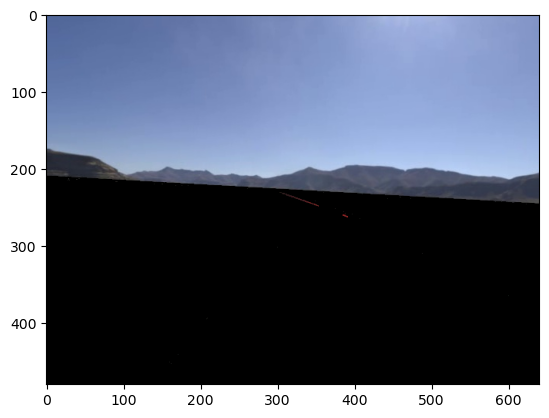

In [88]:
frame = cv2.imread(os.path.join('image_out','2343.jpg'))
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

lower = np.array([0, 240, 200])
upper = np.array([40, 255,255])
mask1 = cv2.inRange(hsv, lower, upper)

lower = np.array([170, 200, 100])
upper = np.array([180, 255,255])
mask2 = cv2.inRange(hsv, lower, upper)

# mask = cv2.bitwise_or(mask1, mask2)
mask = mask1 + mask2
mask = np.clip(mask,0,255).astype(np.uint8)

mask = cv2.dilate(mask,kernel = np.ones((5,5),np.uint8),iterations = 2)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel = np.ones((5,5),np.uint8))
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel = np.ones((5,5),np.uint8))
        
mask = 255 - mask
out = cv2.bitwise_and(frame,frame,mask = mask)
_, mask3 = cv2.threshold(cv2.cvtColor(out, cv2.COLOR_BGR2GRAY), 30, 250, cv2.THRESH_TOZERO)
out = cv2.bitwise_and(out, out, mask=mask3)

plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))


In [82]:
def create_sky_mask_on_hsv(hsv_in):
    
    lower = np.array([90, 45, 100])
    upper = np.array([120, 140,260])

    mask = cv2.inRange(hsv_in, lower, upper)
    mask = 255 - mask
    
    return mask

def create_road_mask_on_hsv(hsv_in):

    lower = np.array([0, 240, 200])
    upper = np.array([40, 255,255])
    mask1 = cv2.inRange(hsv, lower, upper)

    lower = np.array([170, 200, 100])
    upper = np.array([180, 255,255])
    mask2 = cv2.inRange(hsv, lower, upper)

    mask = mask1 + mask2
    mask = np.clip(mask,0,255).astype(np.uint8)

    mask = cv2.dilate(mask,kernel = np.ones((5,5),np.uint8),iterations = 2)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel = np.ones((5,5),np.uint8))
    mask = 255 - mask
    
    return mask

def remove_noise_bgr_dark_patches(bgr_image):
    _, mask = cv2.threshold(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY), 30, 250, cv2.THRESH_TOZERO)
    bgr_image = cv2.bitwise_and(bgr_image, bgr_image, mask=mask)
    return bgr_image
    

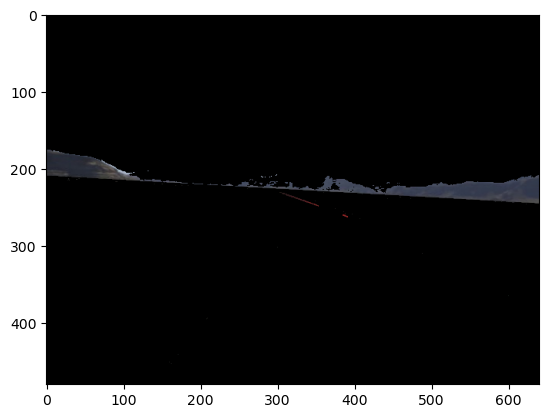

In [89]:
frame = cv2.imread(os.path.join('image_out','2343.jpg'))

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
frame = cv2.bitwise_and(frame, frame, mask=create_sky_mask_on_hsv(hsv))
frame = cv2.bitwise_and(frame, frame, mask=create_road_mask_on_hsv(hsv))

frame = remove_noise_bgr_dark_patches(frame)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Iterate

In [12]:
p = Path('D:/Github/retinal_flow_toolkit/pupil_labs_data/cb13/S001/PupilData/000/world.mp4').as_posix()
video = cv2.VideoCapture(p)

In [13]:
# success, frame = video.read()
# if success:        

#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#     hsv = cv2.bitwise_and(out, out, mask=create_sky_mask_on_hsv(hsv))
#     hsv = cv2.bitwise_and(out, out, mask=create_road_mask_on_hsv(hsv))

#     bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
#     bgr = remove_noise_bgr_dark_patches(bgr)
    
# #     cv2.imshow("test", bgr)
# #     cv2.waitKey(200)

In [17]:
count = 0
success = 1

f = 16340
video.set(cv2.CAP_PROP_POS_FRAMES, f)

while success:
    
    success, frame = video.read()
        
    if success:      
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        frame = cv2.bitwise_and(frame, frame, mask=create_sky_mask_on_hsv(hsv))
        frame = cv2.bitwise_and(frame, frame, mask=create_road_mask_on_hsv(hsv))
    
        frame = remove_noise_bgr_dark_patches(frame)
        
        cv2.imshow("test", frame)
        cv2.waitKey(200)
        
    count = count + 1
    
cv2.destroyAllWindows()
        
#         plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
#         plt.waitforbuttonpress(0)
#         plt.close()

print(count)

KeyboardInterrupt: 

In [ ]:
count